# Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras import models

# Load Data

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
np.isnan(x_train).any()

(60000, 28, 28)


False

In [3]:
np.isnan(x_test).any()

False

## Reshaping and normalizing

In [4]:
x_train= x_train.reshape(60000,28,28,1)
x_train=x_train/255
x_test = x_test.reshape(10000,28,28,1)
x_test=x_test/255

In [5]:
y_train = tf.keras.utils.to_categorical(y_train) #one hot encoding using keras
y_test =  tf.keras.utils.to_categorical(y_test)

# Defining the model

In [6]:
batch_size = 64
num_classes = 10
epochs = 5

In [7]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)), #32 filters of 3x3
    layers.MaxPool2D(2,2),
    layers.Conv2D(64,(3,3), activation = 'relu'), #64 filters of 3x3
    layers.MaxPool2D(2,2),
    layers.Conv2D(64,(3,3), activation = 'relu'), #64 filters of 3x3
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [8]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.1)

Epoch 1/5
844/844 [==============================] - 27s 31ms/step - loss: 0.2075 - accuracy: 0.9352 - val_loss: 0.0622 - val_accuracy: 0.9810
Epoch 2/5
844/844 [==============================] - 25s 30ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.0367 - val_accuracy: 0.9887
Epoch 3/5
844/844 [==============================] - 26s 30ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0426 - val_accuracy: 0.9882
Epoch 4/5
844/844 [==============================] - 26s 31ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0419 - val_accuracy: 0.9898
Epoch 5/5
844/844 [==============================] - 26s 31ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0360 - val_accuracy: 0.9893


# Evaluating the model

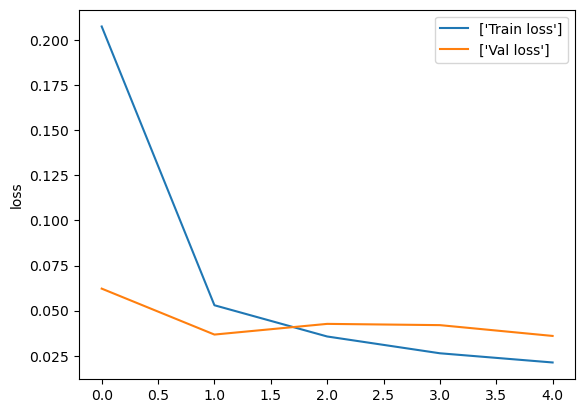

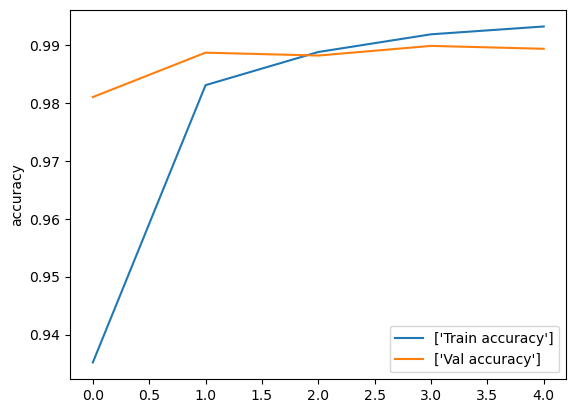

In [13]:
plt.plot(history.history['loss'], label = ['Train loss'])
plt.plot(history.history['val_loss'], label = ['Val loss'])
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = ['Train accuracy'])
plt.plot(history.history['val_accuracy'], label = ['Val accuracy'])
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("CNN model loss: ", test_loss, "\naccuracy: ",test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0282 - accuracy: 0.9906
CNN model loss:  0.028226278722286224 
accuracy:  0.9905999898910522
